In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import math
import collections

In [2]:
iris = load_iris()

In [3]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
#마지막 데이터를 기준으로 가장 가까운 10개의 데이터 찾기(유클리디언)
#10개를 기준으로 target 추정

b = iris['data'][-1]
b

array([5.9, 3. , 5.1, 1.8])

In [9]:
a = iris['data'][0]
a

array([5.1, 3.5, 1.4, 0.2])

In [13]:
sum = 0
for i in range(0,4) :
    sum += (a[i] - b[i])**2
math.sqrt(sum)


4.1400483088968905

In [33]:
test_data = iris['data'][-1]

distance_ls = []

for index, data in enumerate(iris['data'][0:-1]) :
    temp_sum = 0
    for i in range(0,4) :
        temp_sum += (test_data[i] - data[i])**2
    distance_ls.append([math.sqrt(temp_sum), index])

distance_ls.sort(key=lambda x : x[0])
distance_ls


target_ls = []
near_index_ls = [] 
for d in distance_ls[0:10] :
    index = d[1]
    near_index_ls.append(index)
    target_ls.append(iris['target'][index])

print("target_ls : ", target_ls)
print("near_index_ls : ", near_index_ls)
max_target = collections.Counter(target_ls).most_common(n = 1)
max_target[0][0]

target_ls :  [2, 2, 2, 2, 1, 1, 2, 2, 2, 2]
near_index_ls :  [127, 138, 101, 142, 70, 83, 121, 126, 123, 133]


2

In [34]:
#iris['data']의 마지막 데이터와 나머지 데이터의 거리를 계산하고 인덱스 값과 거리 값을 딕셔너리 형태로 저장
dict_distance = {}
for i in range(len(iris['data']) - 1):
  distance = math.sqrt(pow(iris['data'][-1][0] - iris['data'][i][0], 2) + pow(iris['data'][-1][1] - iris['data'][i][1], 2) + pow(iris['data'][-1][2] - iris['data'][i][2], 2) + pow(iris['data'][-1][3] - iris['data'][i][3], 2))
  dict_distance[i] = distance

#딕셔너리를 거리의 크기에 따라 오름차순 정렬
arr_distance = sorted(list(dict_distance.items()), key = lambda x : x[1])
#거리가 작은 순서대로 10개 슬라이싱
selected_arr_distance = arr_distance[:10]

#선택된 10개의 데이터의 타겟값의 개수를 세서 딕셔너리 형태로 저장
dict_result = {0: 0, 1: 0, 2: 0}
for i, j in selected_arr_distance:
  if iris['target'][i] == 0:
    dict_result[0] += 1
  elif iris['target'][i] == 1:
    dict_result[1] += 1
  else:
    dict_result[2] += 1

#타겟값의 개수에 따라 내림차순으로 정렬
result = sorted(dict_result.items(), key = lambda x:x[1], reverse = True)
#가장 큰 값의 타겟값을 프린트
print(result[0][0])


2


In [45]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# iris 데이터를 읽어온다
iris = load_iris()

# 학습 데이터와 시험 데이터로 분리한다
x_train = iris['data'][:-1]
y_train = iris['target'][:-1]
x_test = iris['data'][-1:]

# 시험 데이터와 학습 데이터의 거리를 모두 계산한다.
distance = np.sqrt(((x_train - x_test) ** 2).sum(axis=1))

# 거리와 target을 dataframe으로 저장한다.
df = pd.DataFrame(data= np.c_[distance, y_train], columns= ['distance', 'target'])
# distance를 오름차순 (ascending)으로 정렬한다
df.sort_values(by='distance', inplace=True)
print(df)
# distance가 큰 상위 K를 선택하고, target의 majority를 찾는다
K = 10
candidates = df[:K]['target'].to_numpy().astype('int')
print("candidates", candidates)

counts = np.bincount(candidates)
print("counts", counts)
majority = np.argmax(counts)
print(majority)

from sklearn.neighbors import KNeighborsClassifier

# KNN 모델을 생성한다.
knn = KNeighborsClassifier(n_neighbors = K)
knn.fit(x_train, y_train)

# 시험 데이터의 target을 추정한다.
y_pred = knn.predict(x_test)
print(y_pred)

     distance  target
127  0.282843     2.0
138  0.316228     2.0
142  0.331662     2.0
101  0.331662     2.0
70   0.360555     1.0
..        ...     ...
41   4.374929     0.0
38   4.387482     0.0
42   4.392038     0.0
22   4.628175     0.0
13   4.631414     0.0

[149 rows x 2 columns]
candidates [2 2 2 2 1 1 2 2 2 2]
counts [0 2 8]
2
[2]


In [85]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# iris 데이터를 읽어온다
iris = load_iris()

# 학습 데이터와 시험 데이터로 분리한다
x_train = iris['data'][:-1]
y_train = iris['target'][:-1]
x_test = iris['data'][-1:]

# 시험 데이터와 학습 데이터의 거리를 모두 계산한다.
distance = np.sqrt(((x_train - x_test) ** 2).sum(axis=1))

# 거리와 target을 dataframe으로 저장한다.
df = pd.DataFrame(data= np.c_[distance, y_train, 1/distance], columns= ['distance', 'target', 'weight'])
# distance를 오름차순 (ascending)으로 정렬한다
df.sort_values(by='distance', inplace=True)
print(df)
# distance가 큰 상위 K를 선택하고, target의 majority를 찾는다
K = 10
candidates = df[:K]['target'].to_numpy().astype('int')
print("candidates", candidates)

weight_sum = df[:K]['weight'].sum()
print("weight_sum", weight_sum)

taget_unique = df[:K]['target'].unique()
print("taget_unique", taget_unique)

temp_json = {'0': 0. , '1' : 0., '2' : 0. }


for idx,d in df[:K].iterrows() :
    if d['target'] == 0. :
        temp_json['0'] += d['weight']
    elif d['target'] == 1. :
        temp_json['1'] += d['weight']
    elif d['target'] == 2. :
        temp_json['2'] += d['weight']
        
print(temp_json)
           
counts = np.bincount(candidates)
print("counts", counts)
majority = np.argmax(counts)
print(majority)

from sklearn.neighbors import KNeighborsClassifier

# KNN 모델을 생성한다.
knn = KNeighborsClassifier(n_neighbors = K)
knn.fit(x_train, y_train)

# 시험 데이터의 target을 추정한다.
y_pred = knn.predict(x_test)
print(y_pred)

     distance  target    weight
127  0.282843     2.0  3.535534
138  0.316228     2.0  3.162278
142  0.331662     2.0  3.015113
101  0.331662     2.0  3.015113
70   0.360555     1.0  2.773501
..        ...     ...       ...
41   4.374929     0.0  0.228575
38   4.387482     0.0  0.227921
42   4.392038     0.0  0.227685
22   4.628175     0.0  0.216068
13   4.631414     0.0  0.215917

[149 rows x 3 columns]
candidates [2 2 2 2 1 1 2 2 2 2]
weight_sum 26.202244687363866
taget_unique [2. 1.]
{'0': 0.0, '1': 5.4461134002503915, '2': 20.756131287113472}
counts [0 2 8]
2
[2]


In [86]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# iris 데이터를 읽어온다
iris = load_iris()

# 학습 데이터와 시험 데이터로 분리한다
x_train = iris['data'][:-1]
y_train = iris['target'][:-1]
x_test = iris['data'][-1:]

# 시험 데이터와 학습 데이터의 거리를 모두 계산한다.
distance = np.sqrt(((x_train - x_test) ** 2).sum(axis=1))

# 거리와 target을 dataframe으로 저장한다.
df = pd.DataFrame(data= np.c_[distance, y_train], columns= ['distance', 'target'])

# distance를 오름차순 (ascending)으로 정렬하고, 상위 K개를 선택한다
K = 10
df.sort_values(by='distance', inplace=True)
top_k = df[:K].copy()

# 거리 가중치를 계산한다. (inverse weighting)
top_k['weight'] = 1 / top_k['distance']

# 가중평균 거리를 계산한다.
w_distance = []
for t in [0, 1, 2]:
    w_distance.append(top_k.loc[top_k['target'] == t]['weight'].sum())

w_distance /= top_k['weight'].sum()

# w_distance가 가장 큰 class를 출력한다.
majority = np.argmax(w_distance)
print(majority)

from sklearn.neighbors import KNeighborsClassifier

# KNN 모델을 생성한다.
knn = KNeighborsClassifier(n_neighbors = K, weights='distance')
knn.fit(x_train, y_train)

# 시험 데이터의 target을 추정한다.
y_pred = knn.predict(x_test)
print(y_pred)


2
[2]


120.0
30.0
0.8333333333333334


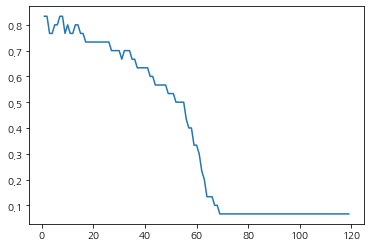

In [117]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import collections
from matplotlib import pyplot as plt

# iris 데이터를 읽어온다
iris = load_iris()

# 학습 데이터와 시험 데이터로 분리한다

print(len(iris['data']) * 8/10)
print(len(iris['data']) * 2/10)

line = int(len(iris['data']) * 8/10)
test_len = len(iris['data']) * 2/10

x_train = iris['data'][:line]
y_train = iris['target'][:line]
x_test = iris['data'][line:]
y_test =iris['target'][line:]

ac_ls = []
# K = 10

for K in range(1,line) :
    
    # KNN 모델을 생성한다.
    knn = KNeighborsClassifier(n_neighbors = K, weights='distance')
    knn.fit(x_train, y_train)

    # 시험 데이터의 target을 추정한다.
    y_pred = knn.predict(x_test)
#     print(y_pred)
#     print(iris['target'][line:])
    mask = np.equal(y_pred, y_test)

    ac = collections.Counter(mask)[True]/test_len
    ac_ls.append(ac)
print(max(ac_ls))

plt.plot(range(1,line), ac_ls)
plt.show()

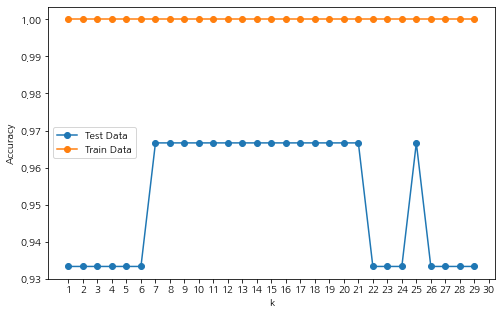

optimal k = 7, accuracy = 0.967


In [127]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# iris 데이터를 읽어온다
iris = load_iris()

# 8:2 비율로 학습 데이터와 시험 데이터를 분리한다.
# 문제점?
n = int(iris['data'].shape[0] * 0.8)

# x_train = iris['data'][:n]
# y_train = iris['target'][:n]
# x_test = iris['data'][n:]
# y_test = iris['target'][n:]

x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)

# k를 변화시켜가면서 정확도를 측정해 본다
acc_test = []
acc_train = []
k_max = 30
for k in range(1, k_max):
    # KNN 으로 학습 데이터 세트를 학습한다.
    knn = KNeighborsClassifier(n_neighbors=k, p=2, weights='distance')
    knn.fit(x_train, y_train)
    
    # 시험 데이터의 Feature에 대한 정확도
    y_pred = knn.predict(x_test)
    acc_test.append((y_test == y_pred).mean())
    
    # 학습 데이터의 Feature에 대한 정확도
    y_pred = knn.predict(x_train)
    acc_train.append((y_train == y_pred).mean())

    # 아래처럼해도 된다.
    # acc_test.append(knn.score(x_test, y_test))
    # acc_train.append(knn.score(x_train, y_train))

plt.figure(figsize=(8, 5))
plt.plot(acc_test, marker='o', label="Test Data")
plt.plot(acc_train, marker='o', label="Train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(np.arange(k_max), np.arange(1, k_max + 1))
plt.show()

opt_k = np.argmax(acc_test)
opt_acc = acc_test[opt_k]

print("optimal k = {}, accuracy = {:.3f}".format(opt_k + 1, opt_acc))